In [1]:
"""
This script creates the figure the mass balance
in its distribution version 

"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import matplotlib.pyplot as plt 
import matplotlib as mpl
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr
from my_fun.nan_helper import nan_helper
from my_fun.reverse_colourmap import reverse_colourmap
from scipy.signal import savgol_filter


In [4]:
filename_nc  = '../../data/output/Peru_out_1_20160901-20170831.nc'
dir_output   = 'out'
name_table1  = 'stat_MB'

name_fig     = 'MB_esp'
name_fig1    = 'MB_esp_annual'
name_fig2    = 'MB_esp_pos'
ds = xr.open_dataset(filename_nc)

time_nc = ds['time'].values
lon_nc  = ds['lon'].values
lat_nc  = ds['lat'].values
HGT_nc  = ds['HGT'].values
mask_nc = ds['MASK'].values

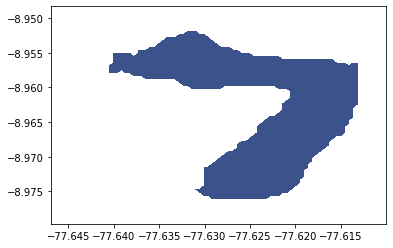

In [5]:
days_sim = int(len(time_nc)/24)

x,y = np.shape(mask_nc)


MB_all  = np.sum(ds['MB'].values,axis=0)

for i in range(len(lat_nc)):
    for j in range(len(lon_nc)):
            if mask_nc[i,j] == 1:
                MB_all[i,j] = MB_all[i,j]
            else:
                MB_all[i,j] = np.nan

MB_all2 = np.sum(ds['MB'].values,axis=0)
for i in range(len(lat_nc)):
    for j in range(len(lon_nc)):
            if mask_nc[i,j] == 1:
                MB_all2[i,j] = MB_all2[i,j]
            else:
                MB_all2[i,j] = np.nan

MB_all2[MB_all2 < 0] = np.nan
MB_all2[MB_all2 >= 0] = 1

# ELA
cmap = mpl.cm.jet
cmap_r = reverse_colourmap(cmap)

im1 = plt.contourf(lon_nc,lat_nc,MB_all2,1)
p = im1.collections[0].get_paths()[0]
v = p.vertices
#y = savgol_filter(x, 5, 2)


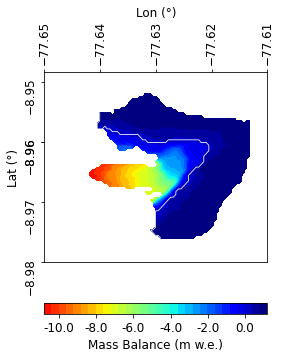

In [7]:
fig, ax = plt.subplots(figsize=(4,5))
im  = ax.contourf(lon_nc,lat_nc,MB_all,30,vmin=-12, vmax=1, cmap=cmap_r)
ax.plot(v[120:300,0],v[120:300,1],'-w', lw=0.8)
ax.set_yticks(np.round(np.linspace(np.min(lat_nc), np.max(lat_nc), 5), decimals=2))
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(which='both', rotation=90)
ax.set_xticks(np.round(np.linspace(np.min(lon_nc), np.max(lon_nc), 5), decimals=2))
ax.yaxis.set_tick_params(which='both', rotation=90)
ax.set_ylabel('Lat (°)')
ax.set_xlabel('Lon (°)')
ax.xaxis.set_label_position('top')
lab_cbar = np.arange(-12,1,2)
fig.colorbar(im, label = 'Mass Balance (m w.e.)', format='%1.1f',
             orientation="horizontal", ticks=lab_cbar)
font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize
fig.savefig(dir_output+'/'+name_fig+'.pdf',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1, format='pdf')